<a href="https://colab.research.google.com/github/adeepH/SPDRA-2021-SharedTask/blob/main/ULMFiT_SPDRA21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
train=pd.read_csv('/content/train.csv', header=None, engine='python', error_bad_lines=False)
train

Skipping line 10977: unexpected end of data


,0,1
0,We extend to natural deduction the approach ...,LO
1,"Over the last decade, the IEEE 802.11 has em...",NI
2,Motivated by the problem of storing coloured...,DS
3,We consider the downlink of a cellular syste...,NI
4,Meroitic is the still undeciphered language ...,CL
...,...,...
10971,The field of remote sensing is nowadays face...,DC
10972,"Recently, word representation has been incre...",CL
10973,An approximate sparse recovery system in ell...,DS
10974,The design of self-sustainable base station ...,NI


In [3]:
val=pd.read_csv('/content/validation.csv', header=None)
val

,0,1
0,Manne et al. designed the first algorithm co...,DC
1,We consider the challenge of creating guidel...,SE
2,Network virtualization techniques allow for ...,NI
3,"In the Min $k$-Cut problem, input is an edge...",DS
4,We introduce the notion of being Weihrauch-c...,LO
...,...,...
11195,The braid group is an important non commutat...,CR
11196,Wireless access points on unmanned aerial ve...,NI
11197,"Nowadays, publish subscribe and event based ...",SE
11198,Prepositions are very common and very ambigu...,CL


In [4]:
df=train.filter([1,0], axis=1)
df_test=val.filter([1,0],axis=1)

In [6]:
#removing @ and #
def punc(df):
    df[0] = df[0].str.replace('[#@()$]','')
    print(df)

In [7]:
punc(df)
punc(df_test)

        1                                                  0
0      LO    We extend to natural deduction the approach ...
1      NI    Over the last decade, the IEEE 802.11 has em...
2      DS    Motivated by the problem of storing coloured...
3      NI    We consider the downlink of a cellular syste...
4      CL    Meroitic is the still undeciphered language ...
...    ..                                                ...
10971  DC    The field of remote sensing is nowadays face...
10972  CL    Recently, word representation has been incre...
10973  DS    An approximate sparse recovery system in ell...
10974  NI    The design of self-sustainable base station ...
10975  LO    This article deals with the interrelation of...

[10976 rows x 2 columns]
        1                                                  0
0      DC    Manne et al. designed the first algorithm co...
1      SE    We consider the challenge of creating guidel...
2      NI    Network virtualization techniques allow for ..

In [8]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [9]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [10]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (10976 items)
x: LMTextList
xxbos xxmaj we extend to natural deduction the approach of xxmaj linear xxmaj nested xxmaj sequents and 
  xxunk . xxmaj formulas are xxunk with a spatial coordinate , which allows a 
  formulation of formal systems in the original spirit of natural 
  deduction --- only one introduction and one elimination rule per connective , no 
  additional structural rule , no explicit reference to the accessibility 
  relation of the intended xxmaj kripke models . xxmaj we give systems for the normal modal 
  logics from k to xxup s4 . xxmaj for the intuitionistic versions of the systems , we define 
  proof reduction , and prove proof normalisation , thus obtaining a syntactical 
  proof of consistency . xxmaj for logics k and xxup k4 we use existence predicates 
  following xxmaj scott for formulating sound deduction rules . 
 ,xxbos xxmaj over the last decade , the xxup ieee 802.11 has emerged

In [11]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.00E-02
Min loss divided by 10: 1.58E-02


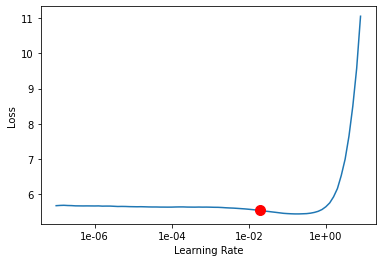

In [12]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [13]:
#fitting the data
learn.fit_one_cycle(2, 2e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.288559,4.071681,0.287020,02:50
1,3.823840,3.857978,0.306478,02:59


In [14]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.927650,3.883109,0.321049,03:33
1,3.707121,3.852654,0.306197,03:33
2,3.191898,3.581856,0.358613,03:33


In [15]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 2.29E-05


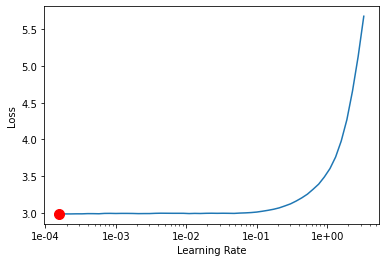

In [16]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [17]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.164633,3.638478,0.353492,03:04
1,3.051156,3.609534,0.355741,03:04
2,2.861603,3.598598,0.357777,03:04


In [18]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-03
Min loss divided by 10: 7.59E-04


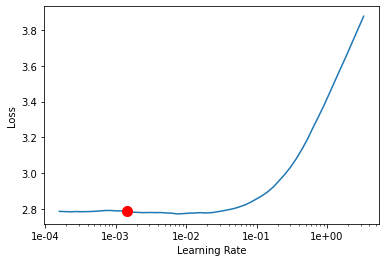

In [19]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [20]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.956592,3.651611,0.354235,03:09
1,2.876632,3.639564,0.356392,03:09
2,2.685963,3.659403,0.355260,03:08


In [21]:
#save the encoder model
learn.save_encoder('my_encoder')

In [22]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [23]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (10976 items)
x: TextList
xxbos xxmaj we extend to natural deduction the approach of xxmaj linear xxmaj nested xxmaj sequents and 
  xxunk . xxmaj formulas are xxunk with a spatial coordinate , which allows a 
  formulation of formal systems in the original spirit of natural 
  deduction --- only one introduction and one elimination rule per connective , no 
  additional structural rule , no explicit reference to the accessibility 
  relation of the intended xxmaj kripke models . xxmaj we give systems for the normal modal 
  logics from k to xxup s4 . xxmaj for the intuitionistic versions of the systems , we define 
  proof reduction , and prove proof normalisation , thus obtaining a syntactical 
  proof of consistency . xxmaj for logics k and xxup k4 we use existence predicates 
  following xxmaj scott for formulating sound deduction rules . 
 ,xxbos xxmaj over the last decade , the xxup ieee 802.11 has emerged as the most popular 


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 7.59E-02


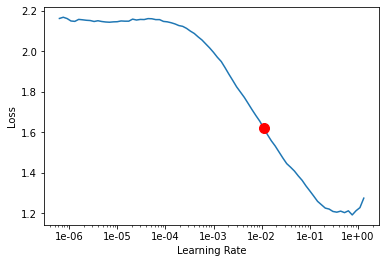

In [24]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [25]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.475801,0.353393,0.879911,0.873753,01:28
1,0.401680,0.298586,0.898839,0.894339,01:28
2,0.349067,0.291906,0.900714,0.895980,01:28


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


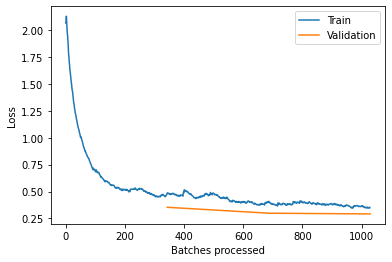

In [26]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.02E-04


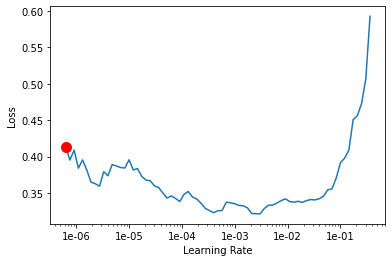

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [28]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.371832,0.304669,0.895268,0.889990,01:38
1,0.311449,0.285983,0.903482,0.898972,01:38


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.92E-05


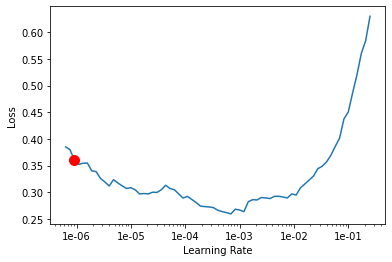

In [29]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [30]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.343358,0.296178,0.901518,0.897569,02:14
1,0.266166,0.277847,0.908929,0.905173,02:14


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [31]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.248637,0.284577,0.905625,0.901505,02:41
1,0.183653,0.283529,0.911518,0.907146,02:41


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.205349,0.308088,0.902589,0.898011,02:43
1,0.126707,0.308427,0.907589,0.903220,02:43


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.105239,0.313690,0.910089,0.906034,02:44
1,0.100718,0.323207,0.911250,0.906883,02:44
2,0.087923,0.316490,0.909911,0.905833,02:43


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [32]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [33]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,1828,2,5,1,14,4,20
1,7,1655,36,8,8,49,30
2,1,55,1110,62,23,79,62
3,6,16,87,1660,27,18,3
4,13,19,8,25,1114,1,35
5,0,62,77,15,3,1659,12
6,11,26,32,3,28,16,1165


In [34]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[1828    2    5    1   14    4   20]
 [   7 1655   36    8    8   49   30]
 [   1   55 1110   62   23   79   62]
 [   6   16   87 1660   27   18    3]
 [  13   19    8   25 1114    1   35]
 [   0   62   77   15    3 1659   12]
 [  11   26   32    3   28   16 1165]]
0.9099107142857142


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1874
           1       0.90      0.92      0.91      1793
           2       0.82      0.80      0.81      1392
           3       0.94      0.91      0.92      1817
           4       0.92      0.92      0.92      1215
           5       0.91      0.91      0.91      1828
           6       0.88      0.91      0.89      1281

    accuracy                           0.91     11200
   macro avg       0.91      0.91      0.91     11200
weighted avg       0.91      0.91      0.91     11200

